In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/mnt/storage/documents/IBS_PhD/programming/ABTT") 
import ABTT
import ABTT.math.rotate3d as rotate3d
import ABTT.math.euler_angles as euler_angles

In [5]:
angles = np.asarray([32, 44, 62], dtype=np.float)
minus_angles = -random_angles
reversed_angles = angles[::-1]
minus_reversed_angles = -reversed_angles
all_angles =  np.asarray([angles, minus_angles, reversed_angles, minus_reversed_angles])
print(all_angles)


[[ 32.  44.  62.]
 [-32. -44. -62.]
 [ 62.  44.  32.]
 [-62. -44. -32.]]


In [27]:
angle_convert = euler_angles.AngleConversion(all_angles, axes='ZXZ', extrinsic=True)
all_matrices = angle_convert.calculate_rotation_matrices()
names = ['matrix_angles', 
         'matrix_minus_angles', 
         'matrix_reversed_angles', 
         'matrix_minus_reversed_angles']

for idx, name in enumerate(names):
    matrix = all_matrices[idx]
    print(matrix,f': {name}')

[[ 0.06156189 -0.92774084  0.36811285]
 [ 0.78741074 -0.18149697 -0.58910371]
 [ 0.61334694  0.32612235  0.7193398 ]] : matrix_angles
[[ 0.06156189  0.92774084  0.36811285]
 [-0.78741074 -0.18149697  0.58910371]
 [ 0.61334694 -0.32612235  0.7193398 ]] : matrix_minus_angles
[[ 0.06156189 -0.78741074  0.61334694]
 [ 0.92774084 -0.18149697 -0.32612235]
 [ 0.36811285  0.58910371  0.7193398 ]] : matrix_reversed_angles
[[ 0.06156189  0.78741074  0.61334694]
 [-0.92774084 -0.18149697  0.32612235]
 [ 0.36811285 -0.58910371  0.7193398 ]] : matrix_minus_reversed_angles


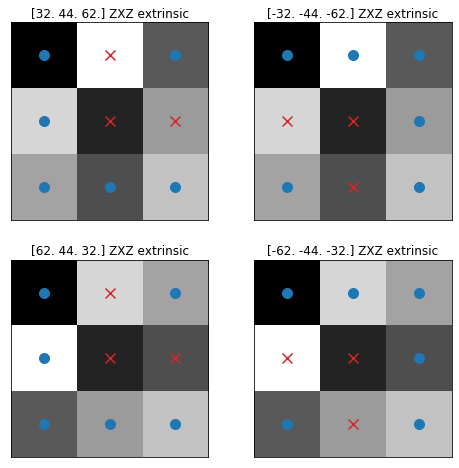

In [61]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(8,8)
def minus_where_negative(axis, matrix):
    for row_idx in range(matrix.shape[0]):
        for column_idx in range(matrix.shape[1]):
            if matrix[row_idx,column_idx] < 0:
                axis.scatter(x=column_idx, y=row_idx, marker='x', c='tab:red', s=100)
                
def plus_where_positive(axis, matrix):
    for row_idx in range(matrix.shape[0]):
        for column_idx in range(matrix.shape[1]):
            if matrix[row_idx,column_idx] > 0:
                axis.scatter(x=column_idx, y=row_idx, marker='o', c='tab:blue', s=100)
idx = 0

for row in range(2):
    for column in range(2):
        current_axis = axes[row][column]
        current_matrix = all_matrices[idx]
        current_axis.set_title(f'{all_angles[idx]} ZXZ extrinsic')
        current_axis.get_xaxis().set_visible(False)
        current_axis.get_yaxis().set_visible(False)
        minus_where_negative(current_axis, current_matrix)
        plus_where_positive(current_axis, current_matrix)
        current_axis.imshow(np.abs(current_matrix), cmap='gray')
        idx += 1
        

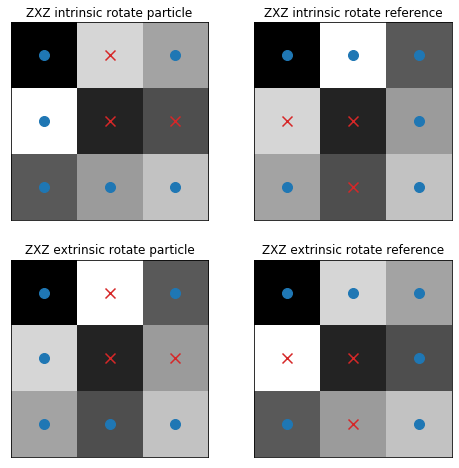

In [70]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(8,8)
def minus_where_negative(axis, matrix):
    for row_idx in range(matrix.shape[0]):
        for column_idx in range(matrix.shape[1]):
            if matrix[row_idx,column_idx] < 0:
                axis.scatter(x=column_idx, y=row_idx, marker='x', c='tab:red', s=100)
                
def plus_where_positive(axis, matrix):
    for row_idx in range(matrix.shape[0]):
        for column_idx in range(matrix.shape[1]):
            if matrix[row_idx,column_idx] > 0:
                axis.scatter(x=column_idx, y=row_idx, marker='o', c='tab:blue', s=100)
idx = 0

for row in range(2):
    for column in range(2):
        angles = np.asarray([32,44,62], dtype=np.float)
        current_axis = axes[row][column]
        rows = ['intrinsic', 'extrinsic']
        columns = ['rotate_particle', 'rotate_reference']
        
        if rows[row] == 'intrinsic' and columns[column] == 'rotate_particle':
            current_matrix = euler_angles.AngleConversion(angles, 'ZXZ', intrinsic=True, reference_frame='rotate_particle').calculate_rotation_matrices()[0]
            current_axis.set_title(f'ZXZ intrinsic rotate particle')
            
        elif rows[row] == 'intrinsic' and columns[column] == 'rotate_reference':
            current_matrix = euler_angles.AngleConversion(angles, 'ZXZ', intrinsic=True, reference_frame='rotate_reference').calculate_rotation_matrices()[0]
            current_matrix = current_matrix.transpose()
            current_axis.set_title(f'ZXZ intrinsic rotate reference')
            
        elif rows[row] == 'extrinsic' and columns[column] == 'rotate_particle':
            current_matrix = euler_angles.AngleConversion(angles, 'ZXZ', extrinsic=True, reference_frame='rotate_particle').calculate_rotation_matrices()[0]
            current_axis.set_title(f'ZXZ extrinsic rotate particle')
            
        elif rows[row] == 'extrinsic' and columns[column] == 'rotate_reference':
            current_matrix = euler_angles.AngleConversion(angles, 'ZXZ', extrinsic=True, reference_frame='rotate_reference').calculate_rotation_matrices()[0]
            current_matrix = current_matrix.transpose()
            current_axis.set_title(f'ZXZ extrinsic rotate reference')
            
        
        current_axis.get_xaxis().set_visible(False)
        current_axis.get_yaxis().set_visible(False)
        minus_where_negative(current_axis, current_matrix)
        plus_where_positive(current_axis, current_matrix)
        current_axis.imshow(np.abs(current_matrix), cmap='gray')
        idx += 1